In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [2]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [3]:
scaler = MinMaxScaler().fit(X_train,y_train)

In [5]:
X_train_scaled = scaler.transform(X_train)

In [7]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
X_test_scaled = scaler.transform(X_test)
print('Test Score: {}'.format(svm.score(X_test_scaled,y_test)))

Test Score: 0.972027972027972


## Parameter Selection with Preprocessing

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print("Best cross validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled,y_test)))
print("Best Parameter: {}".format(grid.best_params_))

Best cross validation accuracy: 0.98
Best set score: 0.97
Best Parameter: {'C': 1, 'gamma': 1}


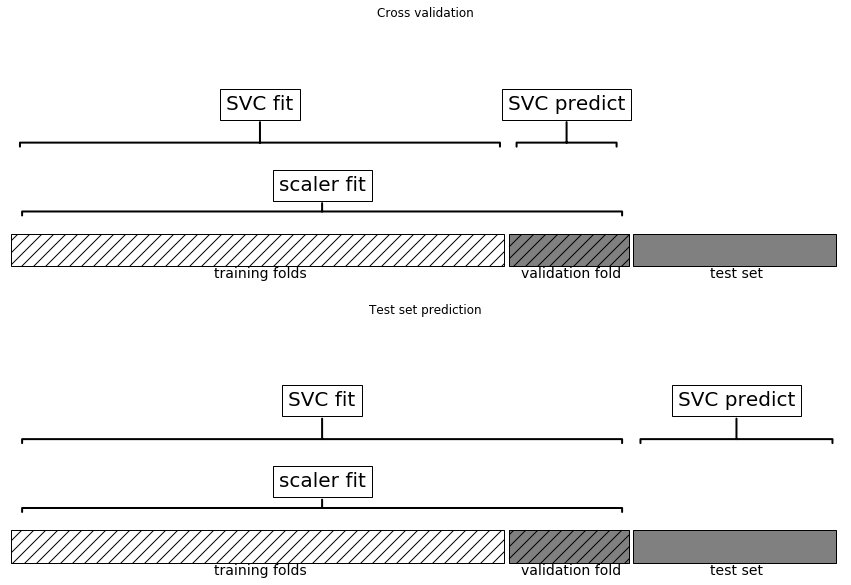

In [24]:
import mglearn
mglearn.plots.plot_improper_processing()

## Bulding Pipeline

In [25]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])

In [26]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [27]:
print("Test score: {}".format(pipe.score(X_test,y_test)))

Test score: 0.972027972027972
